## Fitting models (other than random forest and decision tree)

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.externals import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

### import data in relevant neighborhoods 

In [2]:
filename = '../files/listings_neibourhood.csv'
data_borough = pd.read_csv(filename)
data_borough.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5296 entries, 0 to 5295
Data columns (total 12 columns):
Unnamed: 0                           5296 non-null int64
price                                5296 non-null int64
minimum_nights                       5296 non-null int64
number_of_reviews                    5296 non-null int64
reviews_per_month                    5296 non-null float64
availability_365                     5296 non-null int64
room_type_Entire home/apt            5296 non-null int64
room_type_Private room               5296 non-null int64
room_type_Shared room                5296 non-null int64
neighbourhood_Harlem                 5296 non-null int64
neighbourhood_Morningside Heights    5296 non-null int64
neighbourhood_Upper West Side        5296 non-null int64
dtypes: float64(1), int64(11)
memory usage: 496.6 KB


In [3]:
data_borough.head()

,Unnamed: 0,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_Harlem,neighbourhood_Morningside Heights,neighbourhood_Upper West Side
0,4,150,3,0,0.00,365,0,1,0,1,0,0
1,10,79,2,118,1.03,0,0,1,0,0,0,1
2,13,135,5,43,0.36,53,1,0,0,0,0,1
3,17,85,2,100,0.84,365,0,1,0,0,0,1
4,36,50,3,230,2.02,348,0,1,0,1,0,0


### deletion of irrelevant and dependent feature, normalize data 

In [4]:
y = data_borough['price']
del data_borough['Unnamed: 0']
del data_borough['price']
del data_borough['number_of_reviews']
del data_borough['reviews_per_month']
data_borough['availability_365'] = (data_borough['availability_365'] - data_borough['availability_365'].mean())/(data_borough['availability_365'].std())**2
data_borough['minimum_nights'] = (data_borough['minimum_nights'] - data_borough['minimum_nights'].mean())/(data_borough['minimum_nights'].std())**2
X = data_borough

In [6]:
X.head()

,minimum_nights,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_Harlem,neighbourhood_Morningside Heights,neighbourhood_Upper West Side
0,-0.010470,0.014581,0,1,0,1,0,0
1,-0.012895,-0.006331,0,1,0,0,0,1
2,-0.005619,-0.003295,1,0,0,0,0,1
3,-0.012895,0.014581,0,1,0,0,0,1
4,-0.010470,0.013607,0,1,0,1,0,0


In [68]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15)

### we'll first fit a linear regression to get an idea 

In [69]:
lin_reg = LinearRegression(fit_intercept=True)

In [70]:
reg = LinearRegression().fit(X_train, y_train)

In [71]:
reg.coef_

array([ -41.46463092, 3218.8980716 ,   88.7276347 ,  -28.33013402,
        -60.39750068,  -15.67681289,  -18.6495846 ,   34.32639749])

In [72]:
reg.score(X_train,y_train)

0.07913955401407347

### predictions 

In [73]:
y_preds = reg.predict(X_val)

In [75]:
# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_val, y_preds))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_val, y_preds))

Coefficients: 
 [ -41.46463092 3218.8980716    88.7276347   -28.33013402  -60.39750068
  -15.67681289  -18.6495846    34.32639749]
Mean squared error: 76894.78
Variance score: 0.04


In [77]:
print('mean absolute error on train set: %.2f' % mean_absolute_error(y_train,reg.predict(X_train)))
print('mean absolute error on valuation set: %.2f' % mean_absolute_error(y_val,y_preds))

mean absolute error on train set: 72.58
mean absolute error on valuation set: 77.90


### using statsmodels 

In [78]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     64.37
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           5.59e-77
Time:                        21:17:46   Log-Likelihood:                -31216.
No. Observations:                4501   AIC:                         6.245e+04
Df Residuals:                    4494   BIC:                         6.249e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
minimu

### K-NN

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
errors=list()
for K in range(100):
    knn_model = KNeighborsClassifier(K+1)
    knn_model.fit(X_train,y_train)
    #np.average(knn_model.predict(X_train)==y_test)
    errors.append(mean_squared_error(y_val,knn_model.predict(X_val)))

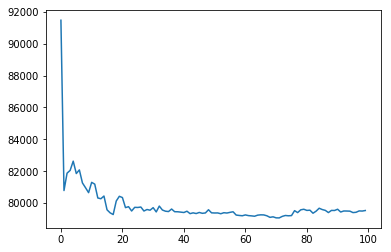

In [104]:
plt.plot(errors)

In [109]:
bestK = np.argmin(errors)+1

In [116]:
knn_model = KNeighborsClassifier(bestK)
knn_model.fit(X_train,y_train)
ypred_val = knn_model.predict(X_val)#to be replaced with an actual test set, not the validation one which we used to select bestK
print('mean absolute error on test set: %.2f' % mean_absolute_error(y_val,ypred_val))

mean absolute error on test set: 67.02


In [86]:
y_val.describe()

count     795.000000
mean      151.621384
std       282.826435
min        25.000000
25%        75.000000
50%       110.000000
75%       160.000000
max      6500.000000
Name: price, dtype: float64

In [85]:
pd.Series(y_pred).describe()

count    795.000000
mean     118.044025
std       62.242229
min       45.000000
25%       70.000000
50%      100.000000
75%      150.000000
max      350.000000
dtype: float64

#### removing very high values of dependent variable and see impact on performance 

In [93]:
data_borough = pd.read_csv(filename)
data_borough_low = data_borough[data_borough['price']<=200]
y_low = data_borough_low['price']
del data_borough_low['Unnamed: 0']
del data_borough_low['price']
del data_borough_low['number_of_reviews']
del data_borough_low['reviews_per_month']
data_borough_low['availability_365'] = (data_borough_low['availability_365'] - data_borough_low['availability_365'].mean())/(data_borough_low['availability_365'].std())**2
data_borough_low['minimum_nights'] = (data_borough_low['minimum_nights'] - data_borough_low['minimum_nights'].mean())/(data_borough_low['minimum_nights'].std())**2
X2 = data_borough_low

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [94]:
X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y_low, test_size=0.15)

In [112]:
errors2 = list()
for K in range(100):
    knn_model = KNeighborsClassifier(K+1)
    knn_model.fit(X2_train,y2_train)
    #np.average(knn_model.predict(X_train)==y_test)
    errors2.append(mean_squared_error(y2_val,knn_model.predict(X2_val)))

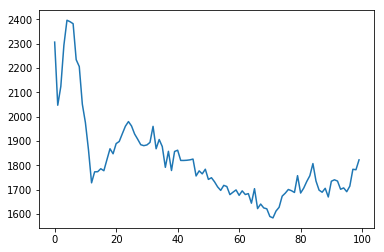

In [113]:
plt.plot(errors2)

In [115]:
bestK2 = np.argmin(errors2)+1

In [120]:
knn_model = KNeighborsClassifier(bestK2)
knn_model.fit(X2_train,y2_train)
ypred_val2 = knn_model.predict(X2_val)
print('mean absolute error on test set: %.2f' % mean_absolute_error(y2_val,ypred_val2))#to be replaced with an actual test set
print('note: improvement overly optimistic, not an actual test set')

mean absolute error on test set: 29.26
note: improvement overly optimistic, not an actual test set
